In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('mental_health_workplace_survey.csv')
print(df.shape)
print(df.info())
print(df.head())

(3000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 

In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
scaler = StandardScaler()
X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
for model, name in zip([dt, rf, knn], ['Decision Tree', 'Random Forest', 'KNN']):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
KNN Accuracy: 0.81


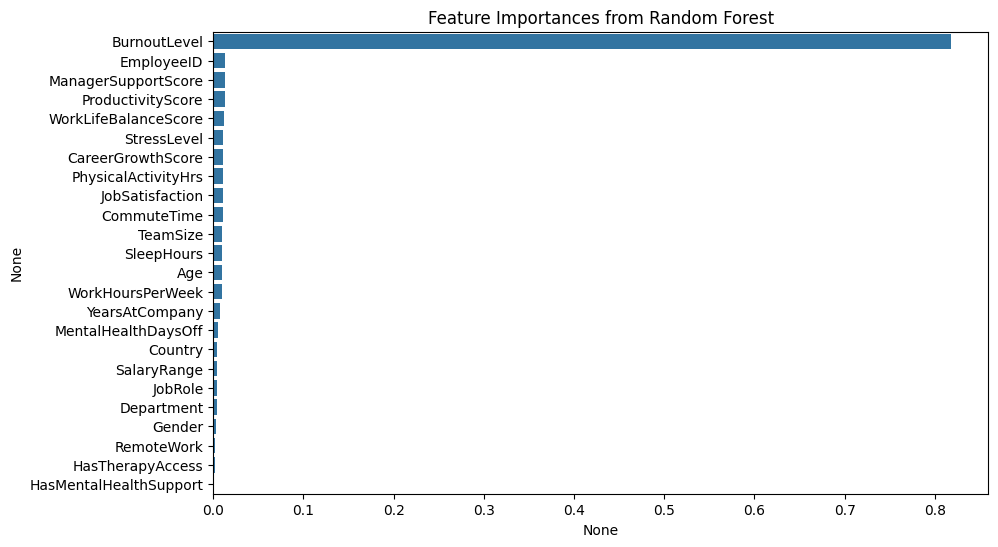

In [ ]:
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances from Random Forest")
plt.show()

In [ ]:
important_feats = feat_imp[feat_imp > 0.01].index
X_selected = df[important_feats]
X_selected_scaled = scaler.fit_transform(X_selected)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

In [ ]:
for model, name in zip([dt, rf, knn], ['Decision Tree', 'Random Forest', 'KNN']):
    model.fit(X_train_sel, y_train_sel)
    y_pred_sel = model.predict(X_test_sel)
    acc_sel = accuracy_score(y_test_sel, y_pred_sel)
    print(f"{name} Accuracy after feature selection: {acc_sel:.2f}")

Decision Tree Accuracy after feature selection: 1.00
Random Forest Accuracy after feature selection: 1.00
KNN Accuracy after feature selection: 0.91
